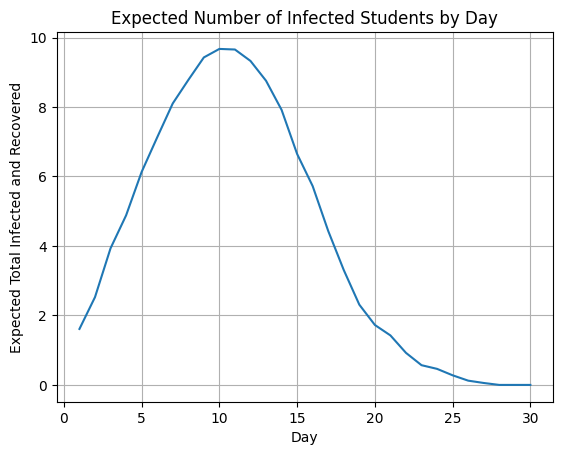

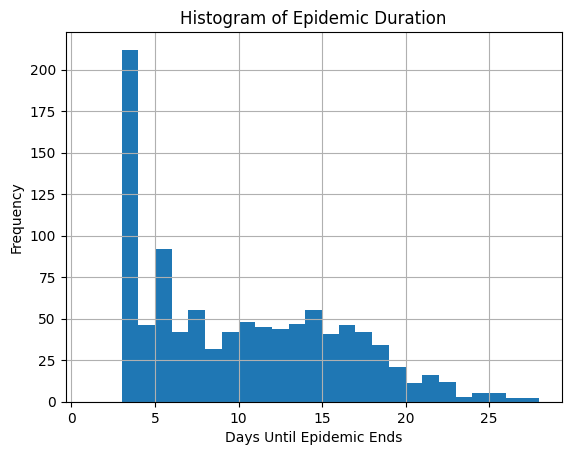

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Defining parameters based on what's given
num_students = 61
infection_prob = 0.01  # infection probability
max_days = 30

# Arrays to store simulation results
total_infected_by_day = np.zeros(max_days)  # accumulate infected counts for expectation
epidemic_durations = []  # store how many days each epidemic lasted

# Run simulation many times
for sim in range(1000):

    # Array to keep track of 61 flu statuses
    statuses = ["S"] * num_students
    statuses[0] = "I"  # first infected person

    # Array to keep track of how many more days student i will remain infectious
    days_left = [0] * num_students
    days_left[0] = 3  # infected for 3 days

    current_day = 0
    daily_infected_total = []  # infected count for each day in this run

    while "I" in statuses and current_day < max_days:
        # Keeping track of today's infected students
        todays_infected = []

        # Looping through each student
        for i in range(num_students):
            # If student i is infected
            if statuses[i] == "I":
                # Check every other student
                for j in range(num_students):
                    # If this other student is susceptible
                    if statuses[j] == "S":
                        # Generate a random probability, if less than infection_prob, this student gets infected
                        if np.random.random() < infection_prob:
                            todays_infected.append(j)

        # change status of today's infected
        for student in todays_infected:
            statuses[student] = "I"
            days_left[student] = 3

        # updating days left status for infected people
        for i in range(num_students):
            # if student i is infected
            if statuses[i] == "I":
                # subtract days left by 1
                days_left[i] -= 1
                # if they are done with their 3 days, they are recovered
                if days_left[i] == 0:
                    statuses[i] = "R"

        # Sum students who have ever been infected
        inf_count = 0
        for each_status in statuses:
            if each_status == "I" or each_status == "R":
                inf_count += 1
        daily_infected_total.append(inf_count)
        current_day += 1

    # Add current run's duration
    epidemic_durations.append(len(daily_infected_total))

    # Accumulate infected counts to compute expected value later
    for day in range(len(daily_infected_total)):
        total_infected_by_day[day] += daily_infected_total[day]

expected_infected= total_infected_by_day / 1000

# Expected # of infected students plot
plt.plot(range(1, max_days + 1), expected_infected)
plt.title('Expected Number of Infected Students by Day')
plt.xlabel('Day')
plt.ylabel('Expected Total Infected and Recovered')
plt.grid(True)
plt.show()

# Histogram of epidemic duration
plt.hist(epidemic_durations, bins=range(1, max(epidemic_durations) + 2))
plt.title('Histogram of Epidemic Duration')
plt.xlabel('Days Until Epidemic Ends')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





    Day  Expected Infected by Day i
0     1                       1.584
1     2                       2.387
2     3                       3.536
3     4                       4.414
4     5                       5.403
..  ...                         ...
82   83                      32.260
83   84                      32.260
84   85                      32.260
85   86                      32.260
86   87                      32.260

[87 rows x 2 columns]


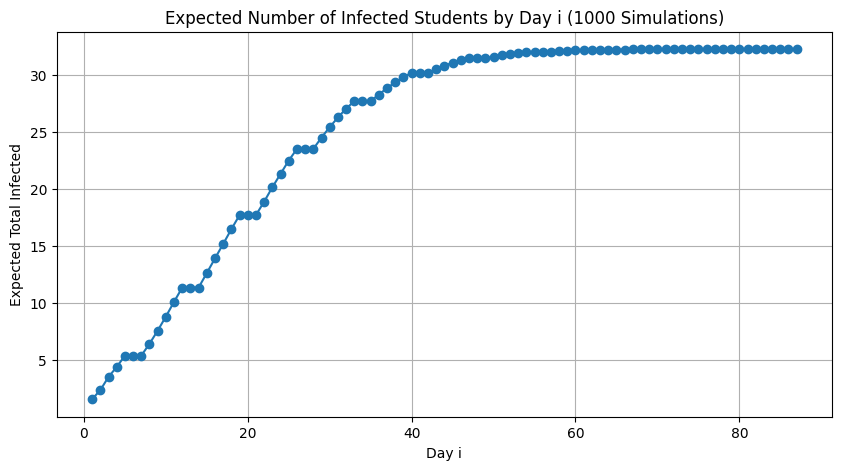

([<matplotlib.axis.XTick at 0x7d4b81403ad0>,
 [Text(4, 0, '4'),
  Text(9, 0, '9'),
  Text(14, 0, '14'),
  Text(19, 0, '19'),
  Text(24, 0, '24'),
  Text(29, 0, '29'),
  Text(34, 0, '34'),
  Text(39, 0, '39'),
  Text(44, 0, '44'),
  Text(49, 0, '49'),
  Text(54, 0, '54'),
  Text(59, 0, '59'),
  Text(64, 0, '64'),
  Text(69, 0, '69'),
  Text(74, 0, '74'),
  Text(79, 0, '79'),
  Text(84, 0, '84')])

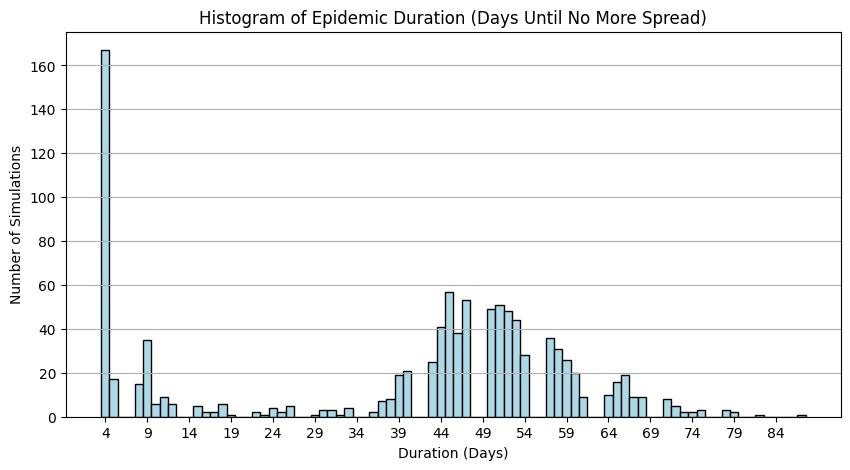

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_flu_spread_weekdays_only(p_infect=0.01, total_kids=61, max_sim_days=100, immunize=False):
    """
    Simulates flu spread in a classroom over weekdays only.
    Kids infected on a given weekday become contagious the next weekday for 3 school days.
    Optionally, each kid (except Tommy) has a 50% chance of being immunized and can't be infected.
    Returns the cumulative number of infected students by each day and the duration of the outbreak.

    Parameters:
        p_infect (float): Probability that an infectious student infects a susceptible one per day.
        total_kids (int): Total number of students, including Tommy (patient zero).
        max_sim_days (int): Maximum number of days to simulate before forcibly stopping.
        immunize (bool): If True, each student (except Tommy) has a 50% chance of being immune.

    Returns:
        cumulative_infected_each_day (list): Running total of infected students by each day.
        current_day (int): Total duration of the epidemic in days.

    """
    # Students 1 to 60 are susceptible; Tommy is labeled -1 and is initially infected
    susceptible_kids = set(range(1, total_kids))  # students 1 through 60, Tommy is -1

    # Check if immunization is enabled before proceeding with flu spread
    if immunize:
        immune_mask = np.random.rand(total_kids) < 0.5  # randomly assign 50% immunity
        immune_mask[0] = False  # ensure Tommy is not immunized
        susceptible_kids = {i for i in susceptible_kids if not immune_mask[i]} # update the set of susceptible kids to exclude those who are immune (based on the mask)

    # Initialize a dictionary to track which students are infectious on each simulation day
    infectious_schedule = {}

    # Schedule Tommy (-1) to be contagious for the first 3 school days
    for d in range(1, max_sim_days + 1): # loop over simulation days
        if (d - 1) % 7 in [5, 6]:  # skip weekends: Saturday (5) and Sunday (6)
            continue
        infectious_schedule.setdefault(d, set()).add(-1) # add Tommy as contagious on this school day
        if len(infectious_schedule) == 3: # stop once 3 school days of contagiousness are assigned
            break

    # Initialize the total infected count with Tommy
    total_infected = 1

    # Create a list to track the cumulative number of infected students at the end of each day
    cumulative_infected_each_day = []

    # Start the simulation on Day 1
    current_day = 1

    # Run loop one day at a time until the max number of simulation days is reached or the epidemic ends early
    while current_day <= max_sim_days:
        if (current_day - 1) % 7 in [5, 6]:  # skip weekends
            cumulative_infected_each_day.append(total_infected) # append the total number of infected students so far, even though no spread happens on this day
            current_day += 1 # move to the next day in the simulation
            continue # skip the rest of the loop body for this day (since it's a weekend)

        infectious_today = infectious_schedule.get(current_day, set()) # get the set of students who are contagious on the current day. if no one is contagious, returns an empty set.
        new_infections_today = set() # create an empty set to store newly infected students for this day

        # Loop through all currently susceptible kids
        for kid in susceptible_kids:
            for contagious_kid in infectious_today: # for each susceptible kid, loop through all contagious students today
                if np.random.rand() < p_infect: # if any contagious student infects them (with probability p_infect), add them to the newly infected set
                    new_infections_today.add(kid)
                    break  # once infected, skip checking others

        # If any new infections occurred today, schedule them to become contagious on future school days
        if new_infections_today:
            day_pointer = current_day + 1 # start assigning infectious days beginning the next day

            # For each newly infected kid, assign them to be contagious for 3 school days (skipping weekends)
            for infected_kid in new_infections_today:
                added_days = 0
                while added_days < 3:
                    if (day_pointer - 1) % 7 in [5, 6]:  # skip weekends
                        day_pointer += 1
                        continue
                    infectious_schedule.setdefault(day_pointer, set()).add(infected_kid)
                    added_days += 1
                    day_pointer += 1
            susceptible_kids -= new_infections_today # remove the newly infected kids from the set of susceptible students
            total_infected += len(new_infections_today) # update the total count of infected students

        cumulative_infected_each_day.append(total_infected) # record the running total of infected students for the current day

        # End if no new or scheduled infectious kids remain
        if not infectious_today and not new_infections_today:
            break

        # Move to the next day in the simulation.
        current_day += 1

    return cumulative_infected_each_day, current_day


# Simulation parameters
num_simulations = 1000
max_days_observed = 0
infection_trajectories = []
epidemic_durations = []

# Run simulations
for _ in range(num_simulations):
    infections, duration = simulate_flu_spread_weekdays_only()
    infection_trajectories.append(infections)
    epidemic_durations.append(duration)
    max_days_observed = max(max_days_observed, len(infections))

# Pad shorter simulations
for trajectory in infection_trajectories:
    if len(trajectory) < max_days_observed:
        trajectory += [trajectory[-1]] * (max_days_observed - len(trajectory))

# Compute expected infected by day i
expected_infections_by_day = np.mean(infection_trajectories, axis=0)

# Display as DataFrame
df = pd.DataFrame({
    'Day': list(range(1, max_days_observed + 1)),
    'Expected Infected by Day i': expected_infections_by_day
})
print(df)

# Plot expected infection curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_days_observed + 1), expected_infections_by_day, marker='o')
plt.title("Expected Number of Infected Students by Day i (1000 Simulations)")
plt.xlabel("Day i")
plt.ylabel("Expected Total Infected")
plt.grid(True)
plt.show()

# Plot histogram of epidemic durations
plt.figure(figsize=(10, 5))
plt.hist(
    epidemic_durations,
    bins=range(min(epidemic_durations), max(epidemic_durations) + 2),
    align='left',
    edgecolor='black',
    color='lightblue'  # <-- adjust color
)

plt.title("Histogram of Epidemic Duration (Days Until No More Spread)")
plt.xlabel("Duration (Days)")
plt.ylabel("Number of Simulations")
plt.grid(axis='y')

# Fix: Show x-axis ticks every 5 days for readability
xtick_spacing = 5
xticks = list(range(min(epidemic_durations), max(epidemic_durations) + 1, xtick_spacing))
plt.xticks(xticks)




    Day  Expected Infected by Day i
0     1                       1.305
1     2                       1.692
2     3                       2.135
3     4                       2.425
4     5                       2.702
5     6                       2.702
6     7                       2.702
7     8                       2.949
8     9                       3.145
9    10                       3.329
10   11                       3.485
11   12                       3.632
12   13                       3.632
13   14                       3.632
14   15                       3.755
15   16                       3.859
16   17                       3.942
17   18                       4.019
18   19                       4.108
19   20                       4.108
20   21                       4.108
21   22                       4.166
22   23                       4.220
23   24                       4.262
24   25                       4.302
25   26                       4.325
26   27                     

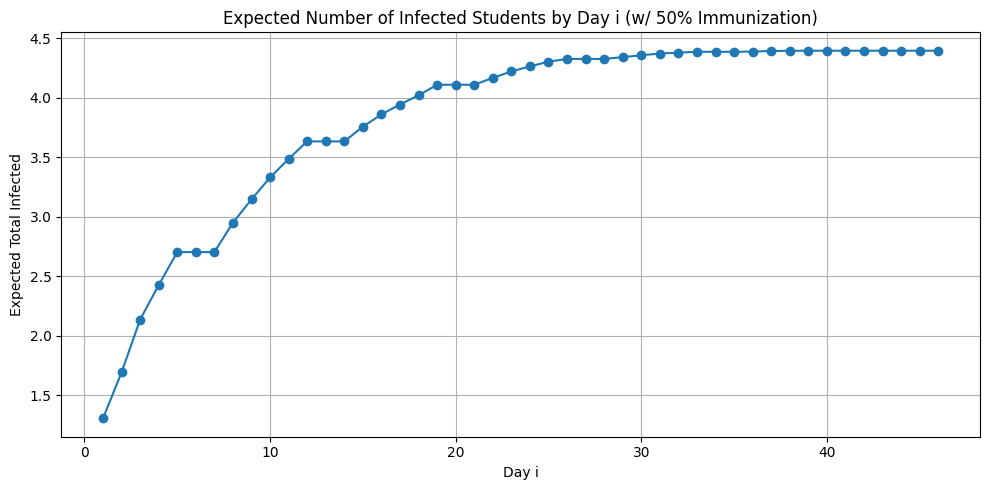

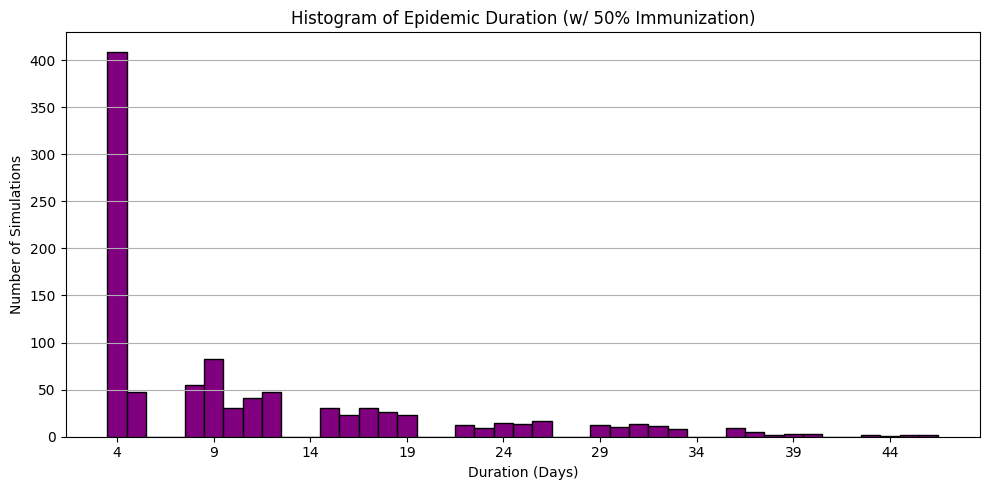

In [ ]:
# Simulation parameters
num_simulations = 1000
max_days_observed = 0
infection_trajectories = []
epidemic_durations = []

# Run simulations WITH 50% immunization
for _ in range(num_simulations):
    infections, duration = simulate_flu_spread_weekdays_only(immunize=True)
    infection_trajectories.append(infections)
    epidemic_durations.append(duration)
    max_days_observed = max(max_days_observed, len(infections))

# Pad shorter simulations
for trajectory in infection_trajectories:
    if len(trajectory) < max_days_observed:
        trajectory += [trajectory[-1]] * (max_days_observed - len(trajectory))

# Compute expected infected by day i
expected_infections_by_day = np.mean(infection_trajectories, axis=0)

# Display as DataFrame
df = pd.DataFrame({
    'Day': list(range(1, max_days_observed + 1)),
    'Expected Infected by Day i': expected_infections_by_day
})
print(df)

# Plot expected infection curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_days_observed + 1), expected_infections_by_day, marker='o')
plt.title("Expected Number of Infected Students by Day i (w/ 50% Immunization)")
plt.xlabel("Day i")
plt.ylabel("Expected Total Infected")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram of epidemic durations
plt.figure(figsize=(10, 5))
plt.hist(
    epidemic_durations,
    bins=range(min(epidemic_durations), max(epidemic_durations) + 2),
    align='left',
    edgecolor='black',
    color='purple'
)
plt.title("Histogram of Epidemic Duration (w/ 50% Immunization)")
plt.xlabel("Duration (Days)")
plt.ylabel("Number of Simulations")
plt.grid(axis='y')

# Tick spacing
xtick_spacing = 5
xticks = list(range(min(epidemic_durations), max(epidemic_durations) + 1, xtick_spacing))
plt.xticks(xticks)

plt.tight_layout()
plt.show()
